# CP421 - A01 # 

## Part 1 ##
### 1.1 Getting Statistics ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
import pandas as pd
from scipy import stats
import random

In [2]:
age_array = np.array([13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70])

#### 1. mean, median, mode ####
mean = age_array.mean()
median = np.median(age_array, axis=None)
mode = stats.mode(age_array)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

print("After visual inspection, 35 also has a count of 4, so there are 2 modes. Therefore, because the data has two peaks in the array ")
print("it may be considered to have bimodal data modality. So, the population has two distinctly bigger population for ages 25 and 35.")

Mean: 29.962962962962962
Median: 25.0
Mode: ModeResult(mode=25, count=4)
After visual inspection, 35 also has a count of 4, so there are 2 modes. Therefore, because the data has two peaks in the array 
it may be considered to have bimodal data modality. So, the population has two distinctly bigger population for ages 25 and 35.


In [3]:
#### 2. Five Number Summary (minimum_value, first quartile, median, third quartile, max_value) ####

print(":::Five Number Summary:::")

min_value = age_array.min()
print("min_value:", min_value)

df = pd.DataFrame(data = age_array)
first_quartile = np.percentile(df, 25)
print("first_quartile:", first_quartile) #may want to round

print("median:", median)

third_quartile = np.percentile(df, 75)
print("third_quartile:", third_quartile)

max_value = age_array.max()
print("max_value", (max_value))

# Interquartile Range (IQR)
IQR = third_quartile - first_quartile

print("IQR:", IQR)

:::Five Number Summary:::
min_value: 13
first_quartile: 20.5
median: 25.0
third_quartile: 35.0
max_value 70
IQR: 14.5


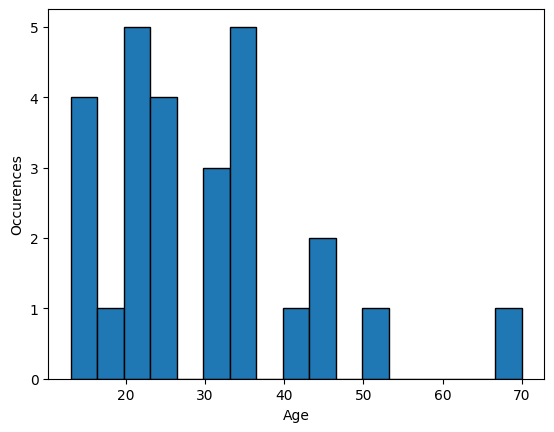

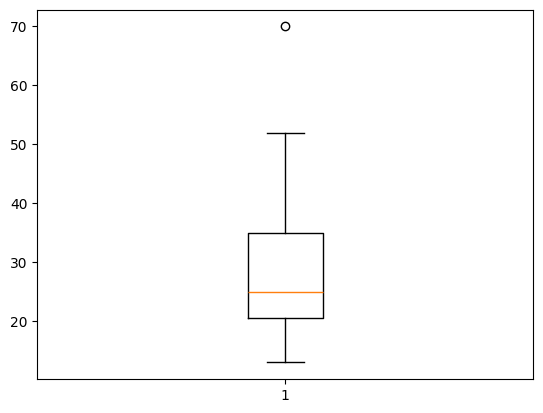

In [4]:
#### 3. Histogram & Boxplot ####
plt.hist(age_array, bins=len(np.unique(age_array)), edgecolor='black')
plt.ylabel('Occurences')
plt.xlabel('Age')
plt.show()

plt.boxplot(age_array)
plt.show()


### 1.2 Document Similarity ###

NOTE: Due to the randomness of python Hashing in step 2., everytime you run this program (close and re-open to reset the memory) you will get a different result.
So, if you run the program and it results in no candidate pairs or it seems to not be displaying, its due to the random hashing and memory storage of python.

In [5]:
##### 1. Convert the documents into sets of words (shingles) #####

# first set of documents
d1 = "Locality sensitive hashing is very useful for large scale applications."
d2 = "LSH is useful for large scale data processing and similarity detection."
d3 = "Hashing techniques are prevalent in large data processing."
d4 = "Locality hashing helps in efficient large scale computations."

# clean up the documents for sets:
def clean_text_for_sets(text):
    alphabet = 'abcdefghijklmnopqrstuvwxyz '
    text = text.lower()

    for character in text:
        if character not in alphabet:
            text = text.replace(character, '')

    return text.split(" ")

doc1 = clean_text_for_sets(d1)
doc2 = clean_text_for_sets(d2)
doc3 = clean_text_for_sets(d3)
doc4 = clean_text_for_sets(d4)

# print the results
print("Cleaned and converted the document words to sets")
print(doc1)
print(doc2)
print(doc3)
print(doc4)
print()


Cleaned and converted the document words to sets
['locality', 'sensitive', 'hashing', 'is', 'very', 'useful', 'for', 'large', 'scale', 'applications']
['lsh', 'is', 'useful', 'for', 'large', 'scale', 'data', 'processing', 'and', 'similarity', 'detection']
['hashing', 'techniques', 'are', 'prevalent', 'in', 'large', 'data', 'processing']
['locality', 'hashing', 'helps', 'in', 'efficient', 'large', 'scale', 'computations']



In [6]:
# 2. Use MinHash to apprx. the jaccard similarity of the document pairs

# we need to have 128 different hash functions for this to work, we will use the same hash function but add an index i; 0-127 to simulate
# it was stated in news that we can use python hash function to hash each set initially(?) 
# h = (123 * x + 456) % 9999991

def word_hash(document):
    words_hashed = []
    for word in document:
        hashed_word = hash(word) % 9999991 #mod number given above
        words_hashed.append(hashed_word)
    return words_hashed

doc1_hashed = word_hash(doc1)
doc2_hashed = word_hash(doc2)
doc3_hashed = word_hash(doc3)
doc4_hashed = word_hash(doc4)

# print the results
print('Documents hashed')
print(doc1_hashed)
print(doc2_hashed)
print(doc3_hashed)
print(doc4_hashed)

# now that all of the words/shingles are hashed we can make the signatures that form the minhash signature set
# "compute 128 minimum hash values by modifying the single gievn hash function" -> so run through all the hashed words and rehash them 128 times

def minhash_signature(document_hashed):
    #initialize a list of large numbers we want to overwrite
    #signature = [random.getrandbits(256)] * 128 
    #everytime I reran the code with random bits on a different day I got a different result for some reason
    signature = 128 * [float('inf')]  

    for i in range(128):
        for hashed_word in document_hashed:
            min_hashed = (123 * (hashed_word + i) + 456) % 9999991 #mode number given above
            
            if signature[i] > min_hashed:
                signature[i] = min_hashed
    
    return signature


# these are now simulated to hae been hashed by 128 functions. Now each document is a: 
# "set of 128 minimum hash values representing the content of the document in compressed form"
doc1_minhashed_sig = minhash_signature(doc1_hashed)
doc2_minhashed_sig = minhash_signature(doc2_hashed)
doc3_minhashed_sig = minhash_signature(doc3_hashed)
doc4_minhashed_sig = minhash_signature(doc4_hashed)


# print the results
print()
print('Documents hashed and minhashed')
print(doc1_minhashed_sig)
print(doc2_minhashed_sig)
print(doc3_minhashed_sig)
print(doc4_minhashed_sig)
print()
print('NOTE:: For some reason 1 or more of the documents will have the same minhash array after this process. The above code seemly does not do this. Please keep this in mind when looking at the results.')
print()

# Calculate the approximate Jaccards from the minhash result
# To do this, we simply want to compare each of the documents with eachother and calculate the result. However, due to the small amount of data the chances of getting "hits"
# is small, therefore, the output will be either an exact match or no match at all. You can visually see this looking at the matching minhashed arrays below.
# Note: if you dont see a matching array that is because of the randomness of hashing in python (luck of the draw).

def minhash_similarity_approximation(all_minhashed_signatures):
    potential_matches = []

    for i in range(len(all_minhashed_signatures)):
        for j in range(i + 1, len(all_minhashed_signatures)):
            minhash_approximation = minhash_similarity_approximation_helper(all_minhashed_signatures[i], all_minhashed_signatures[j])
            print("For the documents:", i, " & ", j)
            print("The approximation from minhash arrays are:", minhash_approximation)
            if minhash_approximation == 1:
                potential_matches.append(((i,j), minhash_approximation))
            print()

def minhash_similarity_approximation_helper(document_signature1, document_signature2):
    temp = 0
    for val1, val2 in zip(document_signature1, document_signature2):
        #print(val1," ", val2)
        if val1 == val2:
            temp+=1

    apprx_jaccards = temp / 128
    return apprx_jaccards

all_minhashed_sig = [doc1_minhashed_sig, doc2_minhashed_sig, doc3_minhashed_sig, doc4_minhashed_sig]
potential_matches = minhash_similarity_approximation(all_minhashed_sig)

print("Positive Matches from the list (pair, value):", potential_matches)
print()
print("Note:: I believe that the reason I am only getting 1 or 0 for the document comparisions is due to the lack of a lot of data to get matching 'hits' between the arrays")
print("Therefore, only the arrays that are hashed similiarly by pythons  hashing seems to have a chance in this instance. Im sure if there was a lot more data, the")
print("results would look differently here.")

Documents hashed
[9851989, 9337692, 59523, 1226279, 6475308, 3331385, 451542, 5753850, 5232404, 6719547]
[4665651, 1226279, 3331385, 451542, 5753850, 5232404, 5683703, 7331395, 1418717, 5438333, 5701624]
[59523, 6150968, 4261216, 3537623, 8197511, 5753850, 5683703, 7331395]
[9851989, 59523, 8459224, 8197511, 9465122, 5753850, 5232404, 9947326]

Documents hashed and minhashed
[832908, 833031, 833154, 833277, 833400, 833523, 833646, 833769, 833892, 834015, 834138, 834261, 834384, 834507, 834630, 834753, 834876, 834999, 835122, 835245, 835368, 835491, 835614, 835737, 835860, 835983, 836106, 836229, 836352, 836475, 836598, 836721, 836844, 836967, 837090, 837213, 837336, 837459, 837582, 837705, 837828, 837951, 838074, 838197, 838320, 838443, 838566, 838689, 838812, 838935, 839058, 839181, 839304, 839427, 839550, 839673, 839796, 839919, 840042, 840165, 840288, 840411, 840534, 840657, 840780, 840903, 841026, 841149, 841272, 841395, 841518, 841641, 841764, 841887, 842010, 842133, 842256, 84237

In [7]:
##### 3. Use LSH to find candidate pairs that are potentially similar #####

# parameters: number of bands as 16, number of rows per band as 8

def LSH(doc1_signature, doc2_signature, doc3_signature, doc4_signature):
    potential_pairs = {}
    candidate_pairs = set()
    
    document_signatures = [doc1_signature, doc2_signature, doc3_signature, doc4_signature]

    for band in range(16):
        counter = 0
        for document_signature in document_signatures:
            signature_place = tuple(document_signature[8 * band : 8 * (band+1)]) #8 is the rows per band
            potential_pair_key = hash(signature_place)
            #print(signature_place)
            #print(potential_pair_key)
            #check to see if we have any pairs for candidates
            if potential_pair_key not in potential_pairs:
                potential_pairs[potential_pair_key] = []
            else:
                for candidate in potential_pairs[potential_pair_key]:
                    candidate_pairs.add(tuple((counter, candidate)))

            potential_pairs[potential_pair_key].append(counter)
            counter += 1
            #print("counter", counter)
            
    return candidate_pairs

#candidate pairs just refers to all document pairs that may be considered similar based on the minhash value arrays
all_candidate_pairs = LSH(doc1_minhashed_sig, doc2_minhashed_sig, doc3_minhashed_sig, doc4_minhashed_sig)
print("All found Candidate pairs:")
print(all_candidate_pairs)



All found Candidate pairs:
{(1, 0)}


In [8]:
##### 4. Compute Jaccard similarity for the candidate pairs and output piars that have similarity above a threshold #####

# for the first set of documents we are looking for a similarity above >0.3
# check all the candidate pairs and output pairs:

def similarity(all_candidate_pairs, documents, target=0.3):
    similar_instances = []

    for val1, val2 in all_candidate_pairs:
        jaccard_similar_value = jaccard_similarity(documents[val1], documents[val2])
        #print(jaccard_similar_value)
        if 0.3 < jaccard_similar_value :
            similar_instances.append(((val1, val2), jaccard_similar_value))

    return similar_instances

def jaccard_similarity(compare1, compare2):
    # Jaccard = J(A, B) = |A n B| / |A U B|
    #print(compare1)
    #print(compare2)
    compare1 = set(compare1)
    compare2 = set(compare2)
    #print(compare1)
    #print(compare2)
    numerator = len(compare1.intersection(compare2))
    denominator = len(compare1.union(compare2))
    #print(numerator)
    #print(denominator)
    jaccard = numerator/denominator
    return jaccard

# Display the resulting jaccard similarity
documents = [doc1, doc2, doc3, doc4]
similar_instances = similarity(all_candidate_pairs, documents)

print('All of the instances of similar pairs:', similar_instances)

print()
for similar in similar_instances:
    print('The document pair', similar[0])
    print('The Jaccard similarity value calculated:', similar[1])

All of the instances of similar pairs: [((1, 0), 0.3125)]

The document pair (1, 0)
The Jaccard similarity value calculated: 0.3125


#### Same as above with Jaccard >0.5 and different document data ####

In [9]:
d1 = "Locality sensitive hashing is useful."
d2 = "Locality sensitive hashing is beneficial."
d3 = "Locality sensitive techniques are useful."
d4 = "Locality hashing is extremely useful."

#text cleaned
print("------------------------------------- Clean and make set of words -------------------------------------")

doc1 = clean_text_for_sets(d1)
doc2 = clean_text_for_sets(d2)
doc3 = clean_text_for_sets(d3)
doc4 = clean_text_for_sets(d4)
print("Cleaned and converted the document words to sets")
print(doc1)
print(doc2)
print(doc3)
print(doc4)
print()

#words hashed
print("------------------------------------- Hash Array -------------------------------------")
doc1_hashed = word_hash(doc1)
doc2_hashed = word_hash(doc2)
doc3_hashed = word_hash(doc3)
doc4_hashed = word_hash(doc4)
print('Documents hashed')
print(doc1_hashed)
print(doc2_hashed)
print(doc3_hashed)
print(doc4_hashed)
print()

#minhash 
print("------------------------------------- Minhash Signature Generation -------------------------------------")
doc1_minhashed_sig = minhash_signature(doc1_hashed)
doc2_minhashed_sig = minhash_signature(doc2_hashed)
doc3_minhashed_sig = minhash_signature(doc3_hashed)
doc4_minhashed_sig = minhash_signature(doc4_hashed)

print()
print('Documents hashed and minhashed')
print(doc1_minhashed_sig)
print(doc2_minhashed_sig)
print(doc3_minhashed_sig)
print(doc4_minhashed_sig)
print()
print('NOTE:: For some reason 1 or more of the documents will have the same minhash array after this process. The code seemly does not do this. Please keep this in mind when looking at the results.')
print()

#Minhash Jaccard apprx.
print("------------------------------------- Minhash Jaccard Approximation -------------------------------------")
all_minhashed_sig = [doc1_minhashed_sig, doc2_minhashed_sig, doc3_minhashed_sig, doc4_minhashed_sig]
potential_matches = minhash_similarity_approximation(all_minhashed_sig)
print("Positive Matches from the list (pair, value):", potential_matches)
print()
print("Note:: I believe that the reason I am only getting 1 or 0 for the document comparisions is due to the lack of a lot of data to get matching 'hits' between the arrays")
print("Therefore, only the arrays that are hashed similiarly by pythons  hashing seems to have a chance in this instance. Im sure if there was a lot more data, the")
print("results would look differently here.")
print()

#LSH
print("------------------------------------- LSH -------------------------------------")
all_candidate_pairs = LSH(doc1_minhashed_sig, doc2_minhashed_sig, doc3_minhashed_sig, doc4_minhashed_sig)
print("All found Candidate pairs:")
print(all_candidate_pairs)


#Jaccards
documents = [doc1, doc2, doc3, doc4]
similar_instances = similarity(all_candidate_pairs, documents, 0.5) #0.5 is the new parameter

print('All of the instances of similar pairs:', similar_instances)

print()
for similar in similar_instances:
    print('The document pair', similar[0])
    print('The Jaccard similarity value calculated:', similar[1])


------------------------------------- Clean and make set of words -------------------------------------
Cleaned and converted the document words to sets
['locality', 'sensitive', 'hashing', 'is', 'useful']
['locality', 'sensitive', 'hashing', 'is', 'beneficial']
['locality', 'sensitive', 'techniques', 'are', 'useful']
['locality', 'hashing', 'is', 'extremely', 'useful']

------------------------------------- Hash Array -------------------------------------
Documents hashed
[9851989, 9337692, 59523, 1226279, 3331385]
[9851989, 9337692, 59523, 1226279, 1258978]
[9851989, 9337692, 6150968, 4261216, 3331385]
[9851989, 59523, 1226279, 7392621, 3331385]

------------------------------------- Minhash Signature Generation -------------------------------------

Documents hashed and minhashed
[832908, 833031, 833154, 833277, 833400, 833523, 833646, 833769, 833892, 834015, 834138, 834261, 834384, 834507, 834630, 834753, 834876, 834999, 835122, 835245, 835368, 835491, 835614, 835737, 835860, 83598


## 2. Cross-selling with Apriori ##

In [10]:
##### 1. a) identify all paries of items of support => 100 #####

from collections import defaultdict
import itertools

def find_frequent_items(carts):
    #defaultdict makes finding items with values simplified here, list of items with a running total
    item_frequency = defaultdict(int)

    for cart in carts:
        for item in cart:
            item_frequency[item] = item_frequency[item] + 1

    #collect all of the items with frequency greater than 100
    filtered_frequent_itemset = {}
    for item, frequency in item_frequency.items():
        if frequency >= SUPPORT:
            filtered_frequent_itemset[item] = frequency

    return filtered_frequent_itemset


# import the file containing all carts
with open("crossselling.txt") as file:
    carts = []
    for each_line in file:
        cart = each_line.strip().split()
        #print(cart)
        carts.append(cart)


# generate the count of items to find frequent items support 100, store frequent items
# SUPPORT = 100
SUPPORT = 250

frequent_items = find_frequent_items(carts)
print("Frequent Items:", len(frequent_items))



Frequent Items: 287


In [11]:
# generate the frequency of pairs of items and the confident scores

def find_frequent_pairs(carts, frequent_items):

    #get all possible frequent pairs, using frequent items > 100
    all_possible_pairs = set(itertools.combinations(frequent_items, 2))
    pair_frequency = defaultdict(int)
    
    for cart in carts:
        for possible_pair in itertools.combinations(cart, 2):
            if possible_pair in all_possible_pairs:
                pair_frequency[possible_pair] = pair_frequency[possible_pair] + 1

    #collect all of the pairs items with frequency greater than 100
    filtered_frequent_pairs = {}
    for pair, frequency in pair_frequency.items():
        if frequency >= SUPPORT:
            filtered_frequent_pairs[pair] = frequency

    return filtered_frequent_pairs

frequent_pairs = find_frequent_pairs(carts, frequent_items)
print("Number of frequent pairs: ", len(frequent_pairs))



def confidence_scores_of_rules_for_pairs(frequent_pairs, frequent_items):
    association_rules = []

    for pair, frequency in frequent_pairs.items():
        for item in pair:
            if item in frequent_items:
                confidence_score = frequency / frequent_items[item]
                association_rules.append((pair, confidence_score))

    return association_rules

pairs_association_rules = confidence_scores_of_rules_for_pairs(frequent_pairs, frequent_items)
print("Number of association rules for pairs:", len(pairs_association_rules))

# get the top 5 association rules
print()
print("Top 5 Rules for Pairs")
sorted_pair_association_rules = sorted(pairs_association_rules, key=lambda x: (-x[1], x[0]))
for i in range(5):
    print(sorted_pair_association_rules[i])

Number of frequent pairs:  52
Number of association rules for pairs: 104

Top 5 Rules for Pairs
(('DAI43868', 'SNA82528'), 0.9527027027027027)
(('DAI62779', 'DAI23334'), 0.951048951048951)
(('FRO40251', 'GRO85051'), 0.8632619439868204)
(('FRO40251', 'FRO92469'), 0.8292108362779741)
(('FRO40251', 'DAI88079'), 0.7477876106194691)


In [12]:
##### b) identify all triples of items of support => 100 #####

# generate the frequency of triple of items
def find_frequent_triple_items(carts):

    #get all possible frequent pairs, using frequent items > 100
    all_possible_triples = set(itertools.combinations(frequent_items, 3))
    triple_frequency = defaultdict(int)
    
    for cart in carts:
        for possible_triple in itertools.combinations(cart, 3):
            if possible_triple in all_possible_triples:
                triple_frequency[possible_triple] = triple_frequency[possible_triple] + 1

    #collect all of the pairs items with frequency greater than 100
    filtered_frequent_triples = {}
    for triple, frequency in triple_frequency.items():
        if frequency >= SUPPORT:
            filtered_frequent_triples[triple] = frequency

    return filtered_frequent_triples    


frequent_triples = find_frequent_triple_items(carts)
print("Number of frequent triples:", len(frequent_triples))
print(frequent_triples)

def confidence_scores_of_rules_for_triples(frequent_triples, frequent_pairs, frequent_items):
    association_rules = []

    for triple, frequency in frequent_triples.items():
        for pair in itertools.combinations(triple, 2):
            if pair in frequent_pairs:
                #if the pair is frequent then the triple must be frequent
                potential_triple = list(set(triple) - set(pair)) #this gets the set difference 
                confidence = frequency / frequent_pairs[pair]
                confirmed_triple_rule = list(pair)
                confirmed_triple_rule.append(potential_triple)
                association_rules.append((confirmed_triple_rule, confidence))

    return association_rules

triples_association_rules = confidence_scores_of_rules_for_triples(frequent_triples, frequent_pairs, frequent_items)
print("Number of association rules for triples:", len(triples_association_rules))

# get the top 5 association rules
print()
print("Top 5 Rules for Triples")
sorted_triple_association_rules = sorted(triples_association_rules, key=lambda x: (-x[1], x[0]))

if len(triples_association_rules) >= 5:
    for i in range(5):
        print(sorted_triple_association_rules[i])
else:
    for i in range(len(triples_association_rules)):
        print(sorted_triple_association_rules[i])

Number of frequent triples: 1
{('FRO40251', 'GRO85051', 'SNA80324'): 259}
Number of association rules for triples: 3

Top 5 Rules for Triples
(['GRO85051', 'SNA80324', ['FRO40251']], 0.8547854785478548)
(['FRO40251', 'SNA80324', ['GRO85051']], 0.26895119418483904)
(['FRO40251', 'GRO85051', ['SNA80324']], 0.24713740458015268)


Results of Tests Recorded for support s=100:

    a) Frequent Items: 647

    b) Number of frequent pairs:  401

    c) Number of frequent triples: 17

    d) Number of association rules for pairs: 802

    e) Number of association rules for triples: 51

    f) 

    Top 5 Rules for Pairs:

    (('FRO40251', 'GRO38636'), 0.9813084112149533)

    (('DAI43868', 'SNA82528'), 0.9527027027027027)

    (('DAI62779', 'DAI23334'), 0.951048951048951)

    (('FRO40251', 'GRO85051'), 0.8632619439868204)

    (('FRO40251', 'FRO92469'), 0.8292108362779741)

    _ _

    Top 5 Rules for Triples:

    (['GRO73461', 'GRO85051', ['FRO40251']], 0.8819444444444444)

    (['SNA53220', 'FRO19221', ['DAI62779']], 0.8770491803278688)

    (['GRO85051', 'SNA80324', ['FRO40251']], 0.8547854785478548)

    (['ELE92920', 'DAI85309', ['SNA18336']], 0.8321678321678322)

    (['GRO85051', 'DAI75645', ['FRO40251']], 0.8195876288659794)

#### 2. Report observations for s=250 ####

    Results of Tests Recorded for support s = 250: 

    a) Frequent Items: 287

    b) Number of frequent pairs:  52

    c) Number of frequent triples: 1

    d) Number of association rules for pairs: 104

    e) Number of association rules for triples: 3

    f)

    Top 5 Rules for Pairs

    (('DAI43868', 'SNA82528'), 0.9527027027027027)

    (('DAI62779', 'DAI23334'), 0.951048951048951)

    (('FRO40251', 'GRO85051'), 0.8632619439868204)

    (('FRO40251', 'FRO92469'), 0.8292108362779741)

    (('FRO40251', 'DAI88079'), 0.7477876106194691)

    _ _

    Top 5 Rules for Triples

    (['GRO85051', 'SNA80324', ['FRO40251']], 0.8547854785478548)

    (['FRO40251', 'SNA80324', ['GRO85051']], 0.26895119418483904)

    (['FRO40251', 'GRO85051', ['SNA80324']], 0.24713740458015268)


##### 3. Analyze the outcomes for both experiments and describe the insights you've gathered #####

        When increasing the support value from test 1 to test 2, its easy to see that the total number of; singletons, pairs, triples, associated rules, and the confidence scores are lower in all cases. This makes sense as we focus in on items that are a more than twice as frequent in the second test compared to the third. Therefore, resulting in less frequent items as values taken into consideration from 100-249 in test1 are ommitted in test2. Additionally, the confidence values also decreases when the support value is increased. So there is a benefit and cost to increasing the support value, the benefit being that there are less sets and rules to take into consideration with the customer buying patterns. However, we may also be missing out on potentially good rules for triple itemsets as almost all of them were removed with the higher support value. Therefore, higher support values are good for very specific rules but miss out on more general patterns or those that arent considered as frequent but still relevant.

### Note: ###

I do not know why, but everytime I close and run the program for question 2 I get a different result, similar to the occurences in question 1. I am unsure on why this is occuring but it may be from my use of sets and itertools to generate the combinations for pairs and triples (I found doing this primitively for finding single item frequency initially to take a long time to run and made the switch to using itertools and using default dictionaries). Although, this does not seem to effect the result for single frequent items in both cases. So, if you run this code and generate different values, I apologise, and please look at the results I put in the markdown portions of the code. Thank you.